In [1]:
import pandas as pd

#df = pd.read_csv("hf://datasets/glnmario/ECHR/ECHR_Dataset.csv")

In [3]:
df.to_csv("../assets/echr/ECHR_Dataset.csv", index=False)

In [2]:
df= pd.read_csv("../assets/echr/ECHR_Dataset.csv")

In [62]:
(df['conclusion'].value_counts()).head(10)

conclusion
Inadmissible                                                                                                                                                                                                                                                      3765
Violation of Art. 6-1                                                                                                                                                                                                                                              203
Violation of Article 6 - Right to a fair trial                                                                                                                                                                                                                     152
Violation of Article 6 - Right to a fair trial (Article 6 - Civil proceedings;Article 6-1 - Reasonable time)                                                                                            

In [3]:
# Helper function to extract article numbers
import re
import pandas as pd
import re

# Define a helper function to extract article numbers
def extract_article_numbers(text):
    # Regular expression pattern to match article numbers
    pattern = r'\b(Art|Article)\.*\s*(\d+(?:-\d+)?)\b'
    # Find all matches in the text
    matches = re.findall(pattern, text, flags=re.IGNORECASE)
    # Extract the article numbers (second group in the pattern)
    article_numbers = [match[1] for match in matches]
    return set(article_numbers)

In [4]:
df['article_numbers'] = df['conclusion'].apply(extract_article_numbers)

# Display the DataFrame
df

,partition,itemid,languageisocode,respondent,branch,date,docname,importance,conclusion,judges,text,binary_judgement,article_numbers
0,dev,001-4817,ENG,ITA,ADMISSIBILITY,1999,ERIKSON v. ITALY,3,Inadmissible,Elisabeth Palm,"The applicant is a British national, born in 1...",0,{}
1,dev,001-89307,ENG,LTU,CHAMBER,2008,CASE OF BALSYTĖ-LIDEIKIENĖ v. LITHUANIA,3,Violation of Art. 6-1;No violation of Art. 10;...,Alvina Gyulumyan;Corneliu Bîrsan;Egbert Myjer;...,"7. The applicant, Mrs Danutė Balsytė-Lideikien...",1,"{10, 6-1}"
2,dev,001-80213,ENG,FIN,CHAMBER,2007,CASE OF W v. FINLAND,3,Violation of Art. 6-1+6-3-d;Non-pecuniary dama...,Nicolas Bratza,6. On 7 August 2000 a mother contacted the pol...,1,{6-1}
3,dev,001-61958,ENG,DEU,CHAMBER,2004,CASE OF CEVIZOVIC v. GERMANY,3,Preliminary objection rejected (estoppel);Viol...,Ireneu Cabral Barreto,"9. The applicant, Zvonko Čevizović, is a Croat...",1,"{5-3, 6-1}"
4,dev,001-113111,ENG,AUT,ADMISSIBILITY,2012,SAHIN v. AUSTRIA,4,Inadmissible,Elisabeth Steiner;Erik Møse;Julia Laffranque;L...,"1. The applicant, Ms Zybeyde Sahin, is an Aust...",0,{}
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11473,train,001-70560,ENG,PRT,CHAMBER,2005,CASE OF ANHEUSER-BUSCH INC. v. PORTUGAL,2,No violation of P1-1,NaN,9. The applicant is an American public company...,0,{}
11474,train,001-22838,ENG,GBR,ADMISSIBILITY,2002,DENNIS AND OTHERS v. THE UNITED KINGDOM,3,Inadmissible,Matti Pellonpää;Nicolas Bratza,"The applicants are 1. Lizette Dennis, a Britis...",0,{}
11475,train,001-106651,ENG,CZE,ADMISSIBILITY,2011,HAVELKA v. THE CZECH REPUBLIC,4,Inadmissible,Dean Spielmann;Elisabet Fura;Ganna Yudkivska;I...,"The applicant, Mr Josef Havelka, is a Czech na...",0,{}
11476,train,001-71813,ENG,MKD,CHAMBER,2005,"CASE OF ATANASOVIC AND OTHERS v. ""THE FORMER Y...",3,Violation of Art. 6-1;Violation of Art. 13;Rem...,David Thór Björgvinsson,"4. The applicants, Mihajlo Atanasovic, Slavko ...",1,"{13, 6-1}"


In [5]:
df['article_numbers'].value_counts().head(20)

article_numbers
{}               4064
{6-1}            1228
{6, 6-1}          420
{3}               411
{6}               255
{13, 6-1}         240
{8}               228
{10}              178
{1}               152
{8-1, 8}          144
{13, 3}           137
{6, 1, 6-1}       131
{10, 10-1}        111
{6, 6-3, 6-1}      99
{5-3}              83
{2, 2-1}           81
{14}               81
{13, 6, 6-1}       77
{6, 1}             74
{2}                68
Name: count, dtype: int64

In [6]:
df['partition'].value_counts()

partition
train    7100
test     2998
dev      1380
Name: count, dtype: int64

In [7]:
df['label'] = df['binary_judgement']

In [8]:
df['label_text'] = df['label'].map({0: 'Violation', 1: 'Non-violation'})

In [9]:

test_df = df[df['partition'] == 'dev']
train_df = df[df['partition'] != 'dev']

In [10]:
train_df=train_df[['text','conclusion', 'article_numbers', 'label_text','label']]
train_df.to_csv("../data/raw/echr/train.csv", index=False)

In [11]:
test_df=test_df[['text','conclusion', 'article_numbers', 'label_text','label']]
test_df.to_csv("../data/raw/echr/test.csv", index=False)

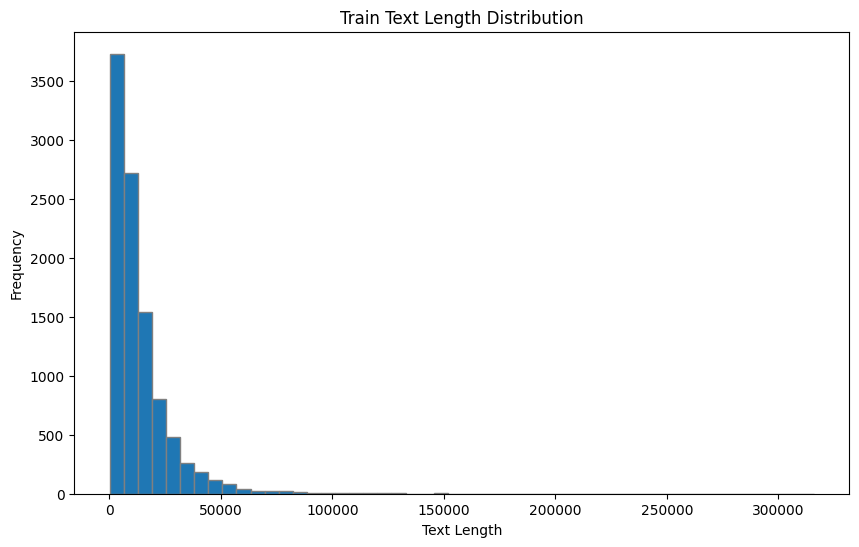

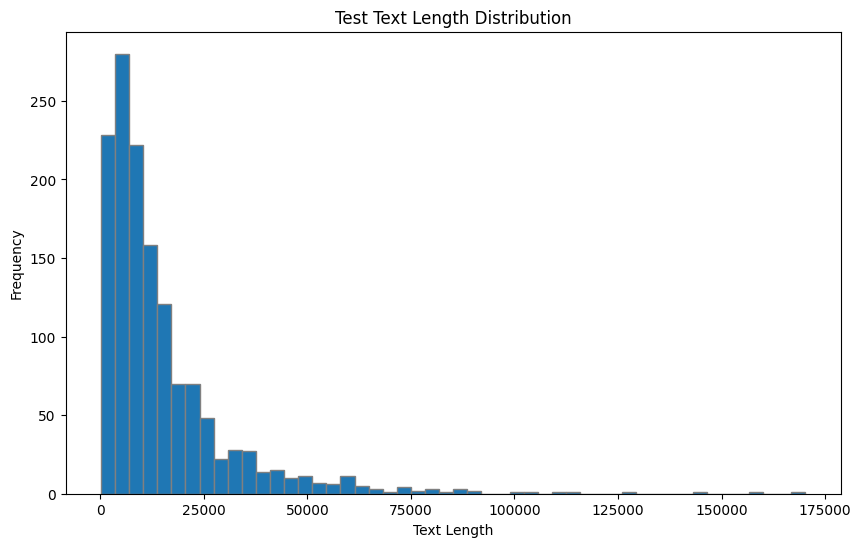

In [12]:
def draw_text_lenght(_df,text):
    import matplotlib.pyplot as plt

    # Calculate the length of each text
    _df['text_length'] = _df['text'].apply(len)

    # Plot the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(_df['text_length'], bins=50, edgecolor='grey')
    plt.title(text)
    plt.xlabel('Text Length')
    plt.ylabel('Frequency')
    plt.show()
draw_text_lenght(train_df,'Train Text Length Distribution')
draw_text_lenght(test_df,'Test Text Length Distribution')

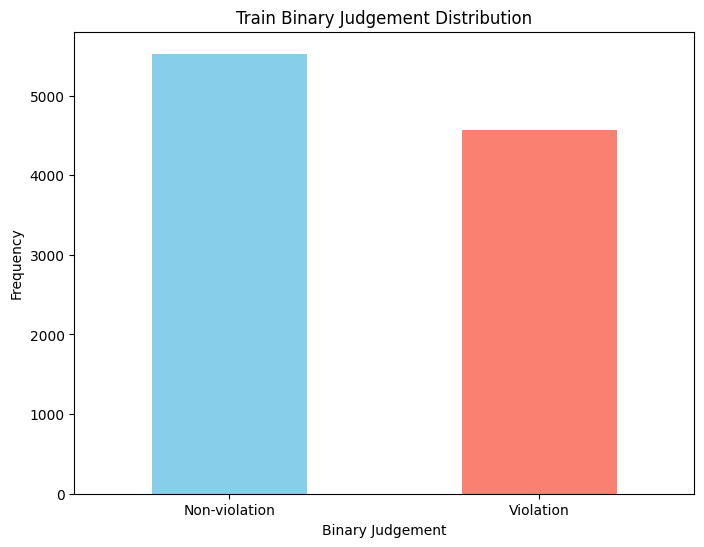

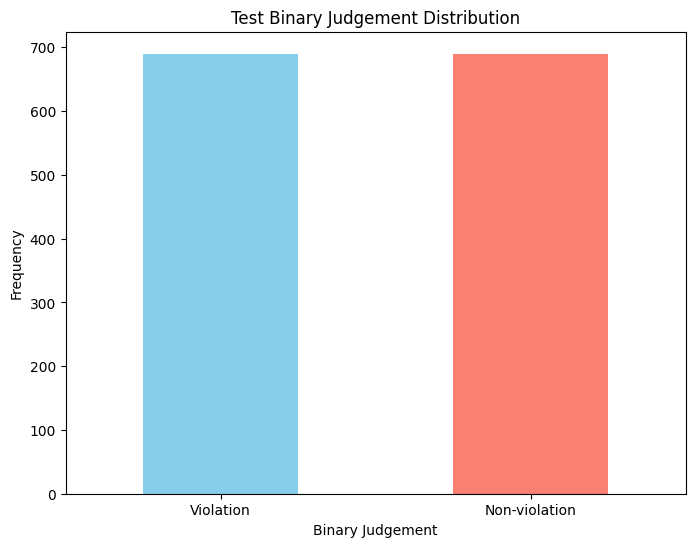

In [13]:
def draw_dist_binary_judgement(_df,text):
    import matplotlib.pyplot as plt

    # Draw the distribution of binary_judgement
    plt.figure(figsize=(8, 6))
    _df['label_text'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
    plt.title(text)
    plt.xlabel('Binary Judgement')
    plt.ylabel('Frequency')
    plt.xticks(rotation=0)
    plt.show()

draw_dist_binary_judgement(train_df,'Train Binary Judgement Distribution')
draw_dist_binary_judgement(test_df,'Test Binary Judgement Distribution')